In [16]:
import os
print (os.getcwd())

/Users/yui/データ分析/ECサイトデータ分析/src


In [22]:
#事前準備
#ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#初期定義
data_dir = '../data'
input_dir = f'{data_dir}/input'
output_dir = f'{data_dir}/output'
input_file = f'{output_dir}/order_processed.csv'

In [25]:
#データの読み込み
df = pd.read_csv(input_file)
display(df.head())

,オーダーID,オーダー日,顧客ID,商品ID,数量,売上,出荷日,キャンセル日,ステータス,氏名,ひらがな,生年月日,性別,都道府県,商品名,カテゴリ,サブカテゴリ,色,サイズ,定価
0,201901010005-1,2019-01-01,C00002159,TB-BUNN,1,9800,2019-01-01,NaN,配達済み,竹田 朋実,たけだ ともみ,1995-07-01,女,東京都,トートバッグ B,バッグ,Unisex,NaN,NaN,9800
1,201901010001-1,2019-01-01,C00000112,TO-AUNN,1,2280,2019-01-04,NaN,配達済み,小川 幸枝,おがわ ゆきえ,1991-06-13,女,神奈川県,タオル A,小物,Unisex,NaN,NaN,2280
2,201901010005-2,2019-01-01,C00002159,PA-BMBS,1,20000,2019-01-02,NaN,配達済み,竹田 朋実,たけだ ともみ,1995-07-01,女,東京都,Men Black パンツ B S,ボトムス,Men,Black,S,20000
3,201901010004-1,2019-01-01,C00001710,BP-BUNN,1,9800,2019-01-01,NaN,配達済み,植田 陽一,うえだ よういち,1995-06-23,男,東京都,バックパック B,バッグ,Unisex,NaN,NaN,9800
4,201901020019-2,2019-01-02,C00001925,PA-AMBL,1,16500,2019-01-07,NaN,配達済み,原田 由香,はらだ ゆか,1975-10-12,女,大阪府,Men Black パンツ A L,ボトムス,Men,Black,L,16500


In [28]:
#データの全体像の可視化
#指標データに関する基本的な数値の確認
display(df.describe())
#平均値と中央値を比較する

,数量,売上,定価
count,13670.000000,13670.000000,13670.000000
mean,1.283175,16747.298464,13083.970739
std,0.679370,13668.663074,7340.663527
min,1.000000,980.000000,980.000000
25%,1.000000,7900.000000,7600.000000
50%,1.000000,14500.000000,14300.000000
75%,1.000000,19800.000000,18100.000000
max,4.000000,164800.000000,41200.000000


(array([8.551e+03, 3.830e+03, 8.430e+02, 2.840e+02, 1.230e+02, 1.900e+01,
        1.000e+00, 1.400e+01, 0.000e+00, 5.000e+00]),
 array([   980.,  17362.,  33744.,  50126.,  66508.,  82890.,  99272.,
        115654., 132036., 148418., 164800.]),
 <BarContainer object of 10 artists>)

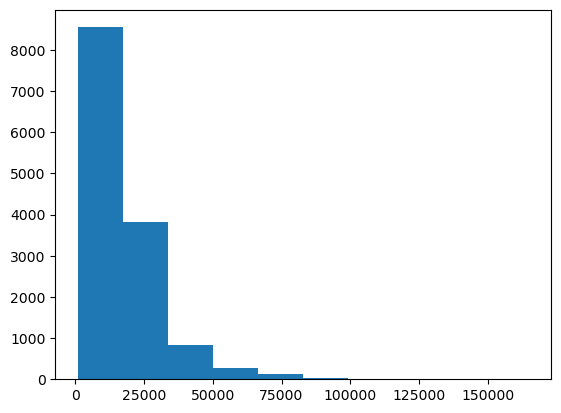

In [30]:
#指標データの分布をみる
plt.hist(df['売上'])

(array([11196.,     0.,     0.,  1447.,     0.,     0.,   657.,     0.,
            0.,   370.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

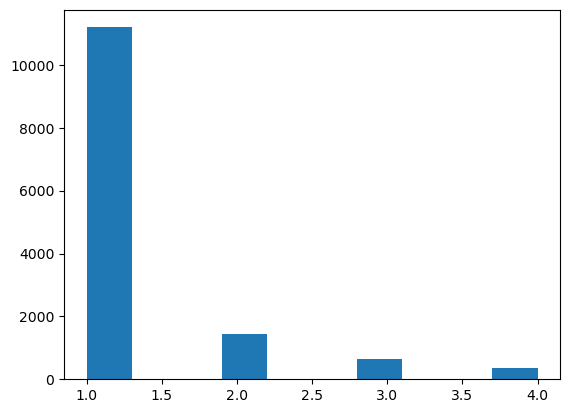

In [31]:
plt.hist(df['数量'])

In [36]:
#様々な切り口でデータを可視化
#切り口を設定して可視化を行う際は、「集計」→「可視化」という手順を踏む必要がある

#商品カテゴリごとの売上を可視化する
df_viz = df[['カテゴリ','売上']]#dfより２列のみ抽出
df_viz = df_viz.groupby('カテゴリ',as_index=False).sum()

display(df_viz)

,カテゴリ,売上
0,アウター,42221600
1,トップス,66946200
2,バッグ,23249530
3,ボトムス,88827600
4,小物,7690640


<BarContainer object of 5 artists>

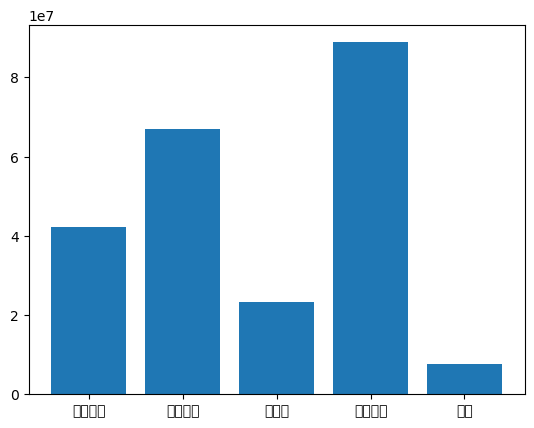

In [39]:
#棒グラフで可視化
plt.bar(df_viz['カテゴリ'],df_viz['売上'])#第１引数が切り口、第２引数が指標

In [42]:
df_viz = df[['カテゴリ','性別','売上']]
df_viz = df_viz.groupby(['カテゴリ','性別'],as_index = False).sum()#カテゴリ別かつ性別の売上を集計する
df_viz = df_viz.pivot(index='性別',columns='カテゴリ',values='売上')#性別を行名（index）、カテゴリを列名(colums)、売上を値（values）に指定

display(df_viz)

カテゴリ,アウター,トップス,バッグ,ボトムス,小物
性別,,,,,
女,27870000,45509300,15707260,59704800,5303940
男,14351600,21436900,7542270,29122800,2386700


/var/folders/vb/ffs07nd50nz35z5hszmshktr0000gn/T/ipykernel_51310/2358504413.py:6: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  plt.savefig(f'{output_dir}/カテゴリ_性別ごとの売上.png')
/var/folders/vb/ffs07nd50nz35z5hszmshktr0000gn/T/ipykernel_51310/2358504413.py:6: UserWarning: Glyph 12454 (\N{KATAKANA LETTER U}) missing from current font.
  plt.savefig(f'{output_dir}/カテゴリ_性別ごとの売上.png')
/var/folders/vb/ffs07nd50nz35z5hszmshktr0000gn/T/ipykernel_51310/2358504413.py:6: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.savefig(f'{output_dir}/カテゴリ_性別ごとの売上.png')
/var/folders/vb/ffs07nd50nz35z5hszmshktr0000gn/T/ipykernel_51310/2358504413.py:6: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.savefig(f'{output_dir}/カテゴリ_性別ごとの売上.png')
/var/folders/vb/ffs07nd50nz35z5hszmshktr0000gn/T/ipykernel_51310/2358504413.py:6: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current f

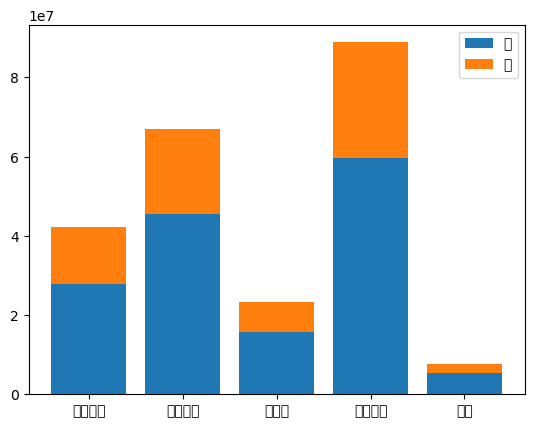

In [49]:
#積み上げ棒グラフで可視化
for i in range(len(df_viz)):#for i in range()でfor文
    plt.bar(df_viz.columns,df_viz.iloc[i],bottom=df_viz.iloc[0:i].sum())#第１引数が切り口、第２引数が指標　 iloc[]は行番号や列番号といった数値を指定して抽出する
plt.legend(df_viz.index)#色の凡例を表示する
#データの出力
plt.savefig(f'{output_dir}/カテゴリ_性別ごとの売上.png')